In [1]:
path = r'C:\Users\Ivelin_Angelov\source\repos\PyProject\PythonApplication1\PythonApplication1'
import sys
sys.path.append(path)

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from PDEsolver import *
from decomposer import *
from linearsolve import *
from pdesolverfactory import *
from blackscholes import *
from forwardeuler import *
from pde.pde import *

In [4]:
def normal_error(aproxx_func, analytic_func, d_S):
    a = aproxx_func(d_S)  
    b = analytic_func
    return np.abs(a-b)/np.abs(b)

In [12]:
s = 138.50
k = 110
vol = 0.16
t = 1.632876712
r = 0.01
q = 0.0 
S_max = 250

analytic = BS_premium(s,k,t,r,vol, False)

delta_t = lambda d_t: int(t/d_t)
aproxx_func_fe = lambda x: solve_pde_fe_generic(s,k,vol, t,r, 250, x, False, S_max=250)
aproxx_func_cn = lambda x: solve_pde_cn_generic(s,k,vol, t,r, 250, x, False, S_max=250)
aproxx_func_be = lambda x: solve_pde_be_generic(s,k,vol, t,r, 250, x, False, S_max=250)

delta_s = lambda d_s: int(S_max/d_s)
aproxx_func_fe_2 = lambda x: solve_pde_fe_generic(s,k,vol, t,r, x, 160, False, S_max=250)
aproxx_func_cn_2 = lambda x: solve_pde_cn_generic(s,k,vol, t,r, x, 160, False, S_max=250)
aproxx_func_be_2 = lambda x: solve_pde_be_generic(s,k,vol, t,r, x, 160, False, S_max=250)

aproxx_func_fe_3 = lambda x: solve_pde_fe_generic(s,x,vol, t,r, 250, 160, False, S_max=250)
aproxx_func_cn_3 = lambda x: solve_pde_cn_generic(s,x,vol, t,r, 250, 160, False, S_max=250)
aproxx_func_be_3 = lambda x: solve_pde_be_generic(s,x,vol, t,r, 250, 160, False, S_max=250)

In [25]:
deltas = np.array([1*10**(-i) for i in range(1,6)])
n_sizes = np.array([delta_t(i) for i in deltas])
err = np.array([normal_error(aproxx_func_fe,analytic,  x) for x in n_sizes])
#err2 = np.array([normal_error(aproxx_func_be,analytic,  x) for x in n_sizes])
err3 = np.array([normal_error(aproxx_func_cn,analytic,  x) for x in n_sizes])


In [10]:
deltas_s = np.array([1*10**(-i+2) for i in range(1,5)])
m_sizes = np.array([delta_s(i) for i in deltas_s])
err_s = np.array([normal_error(aproxx_func_fe_2,analytic,  x) for x in m_sizes])
#err2 = np.array([normal_error(aproxx_func_be,analytic,  x) for x in n_sizes])
err3_s = np.array([normal_error(aproxx_func_cn_2,analytic,  x) for x in m_sizes])

In [23]:
strikes = np.array(range(110,190,10))
analytic_k = np.array([BS_premium(s,x_,t,r,vol, False) for x_ in strikes])
err_k = np.array([normal_error(aproxx_func_fe_3,price,  x) for x, price in zip(strikes, analytic_k)])
#err2 = np.array([normal_error(aproxx_func_be,analytic,  x) for x in n_sizes])
err3_k = np.array([normal_error(aproxx_func_cn_3,price,  x) for x, price in zip(strikes, analytic_k)])

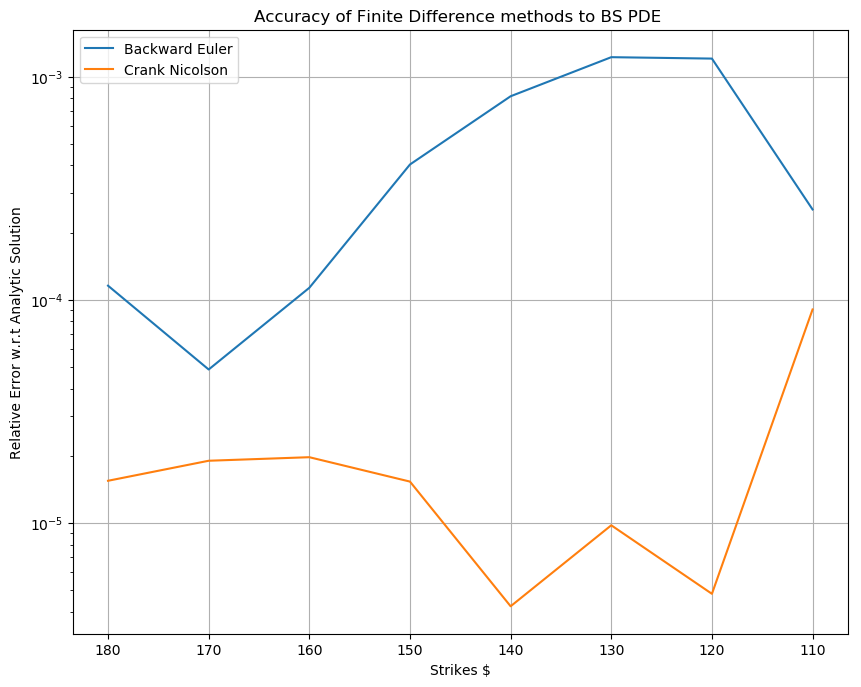

In [24]:
fig = figure(figsize=[10,8], dpi=100)
plot(strikes, err_k, label="Backward Euler")
#plot(deltas, err2, label="backward difference")
plot(strikes, err3_k, label="Crank Nicolson")
pylab.xlabel("Strikes $")
pylab.ylabel("Relative Error w.r.t Analytic Solution")
pylab.title("Accuracy of Finite Difference methods to BS PDE ")
yscale('log')
#xscale()
ax =gca()
ax.invert_xaxis()
legend()
grid()

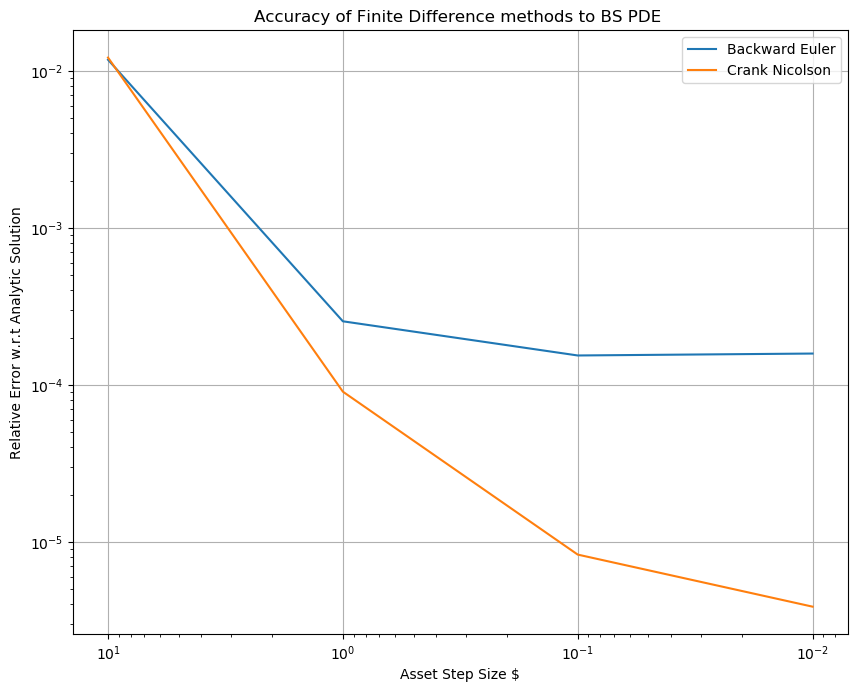

In [11]:
fig = figure(figsize=[10,8], dpi=100)
plot(deltas_s, err_s, label="Backward Euler")
#plot(deltas, err2, label="backward difference")
plot(deltas_s, err3_s, label="Crank Nicolson")
pylab.xlabel("Asset Step Size $")
pylab.ylabel("Relative Error w.r.t Analytic Solution")
pylab.title("Accuracy of Finite Difference methods to BS PDE ")
yscale('log')
xscale('log')
ax =gca()
ax.invert_xaxis()
legend()
grid()

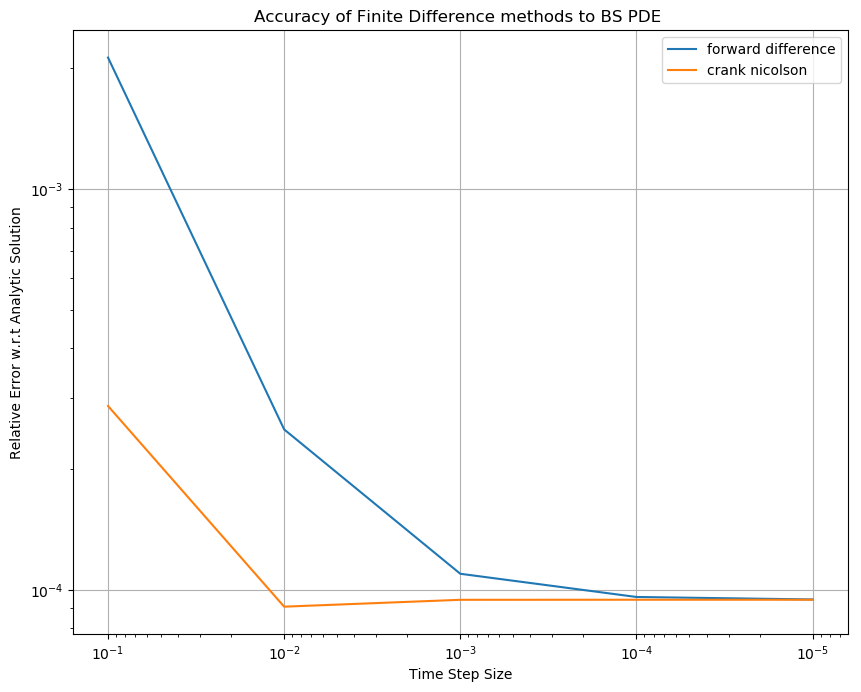

In [21]:
fig = figure(figsize=[10,8], dpi=100)
plot(deltas, err, label="forward difference")
#plot(deltas, err2, label="backward difference")
plot(deltas, err3, label="crank nicolson")
pylab.xlabel("Time Step Size")
pylab.ylabel("Relative Error w.r.t Analytic Solution")
pylab.title("Accuracy of Finite Difference methods to BS PDE ")
yscale('log')
xscale('log')
ax =gca()
ax.invert_xaxis()
legend()
grid()